In [19]:
from api_lib import *
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import pandas as pd
import statistics

%matplotlib inline

In [20]:
orders = read_json('orders.json')
reviews = read_json('reviews.json')

In [21]:
def extract_data(data, parameter1, parameter2 = None):
    extracted_data = []
    
    if parameter2 is not None:
        for i in range(len(data)):
            data_pair = []
            data_pair.append(data[i][parameter1])
            data_pair.append(data[i][parameter2])
            extracted_data.append(data_pair)
    else:
        for i in range(len(data)):
            extracted_data.append(data[i][parameter1])

    return extracted_data

In [22]:
# Number of orders per customer / Repeat vs single orders
buyer_user_id = extract_data(orders, "buyer_user_id")

# Time between orders
order_time = extract_data(orders, 'create_timestamp')

# Geolocation
address = extract_data(orders, 'first_line')
city = extract_data(orders, 'city')
state = extract_data(orders, 'state')
zipcode = extract_data(orders, 'zip')
country = extract_data(orders, 'country_iso')
id_state = extract_data(orders, 'buyer_user_id', 'state')

# Order size
id_subtotal_dict = extract_data(orders, 'buyer_user_id', 'subtotal')

# What products sell best - where
#product_id = extract_data('product_id')

# Number of orders per customers

Counter({1: 1807, 2: 182, 3: 43, 4: 12, 5: 9, 6: 2, 8: 1})
dict_keys([1, 2, 3, 4, 6, 5, 8])
dict_values([1807, 182, 43, 12, 2, 9, 1])


Text(0.5, 1.0, 'How many orders a customer places')

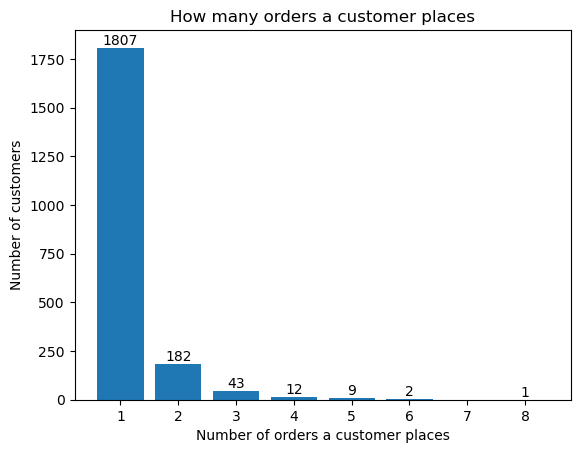

In [23]:
num_orders_by_customers = list(Counter(buyer_user_id).values())

num_orders_by_customers.remove(37)

orders_per_customer = Counter(num_orders_by_customers)

num_reorders = orders_per_customer.keys()
num_customers = orders_per_customer.values()

print(orders_per_customer)

labels = [str(item) for item in list(num_customers)]

print(num_reorders)
print(num_customers)

fig, ax = plt.subplots()
bars = ax.bar(num_reorders, num_customers, label=labels)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.xlabel("Number of orders a customer places")
plt.ylabel("Number of customers")
plt.title("How many orders a customer places")

# Repeat orders vs single orders

([<matplotlib.patches.Wedge at 0x7ad2fddc60d0>,
 [Text(0.9978925219730729, 0.462828817804402, 'Repeat Customers'),
  Text(-0.9978925219730729, -0.4628288178044021, 'Single Order Customers')],
 [Text(0.5443050119853124, 0.2524520824387647, '13.8%'),
  Text(-0.5443050119853124, -0.25245208243876477, '86.2%')])

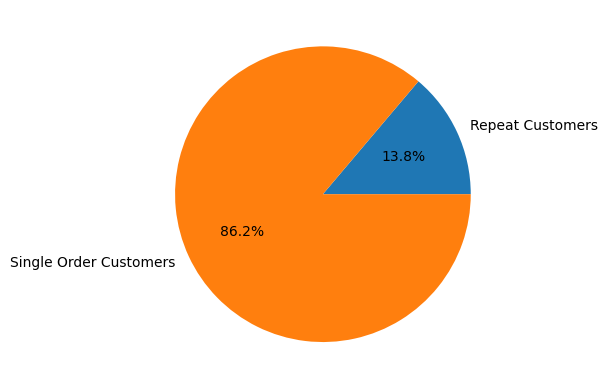

In [24]:
already_assessed = []
repeat_orders = 0
for id in buyer_user_id:
    if id in already_assessed:
        repeat_orders += 1
    already_assessed.append(id)


sizes = [repeat_orders, len(buyer_user_id)]
labels = ["Repeat Customers", "Single Order Customers"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Reorder Size

In [25]:
num_orders_by_id = Counter(buyer_user_id)

id_subtotal = []
for customer in id_subtotal_dict:
    id_subtotal.append([customer[0], customer[1]['amount']/customer[1]['divisor']])

single_order_customers = []
multiple_order_customers = []

for customer in id_subtotal:
    if num_orders_by_id[customer[0]] > 1:
        multiple_order_customers.append(customer[1])
    else:
        single_order_customers.append(customer[1])

print(statistics.mean(single_order_customers))
print(statistics.mean(multiple_order_customers))

print(statistics.median(single_order_customers))
print(statistics.median(multiple_order_customers))

36.562589928057555
37.32480559875583
24.0
24.0


# Time Between orders

In [26]:
from datetime import datetime

for i in range(len(order_time)):
    order_time[i] = datetime.fromtimestamp(order_time[i])


[datetime.timedelta(days=1026, seconds=21904), datetime.timedelta(days=9, seconds=14623), datetime.timedelta(seconds=811), datetime.timedelta(seconds=3827), datetime.timedelta(seconds=424), datetime.timedelta(seconds=510), datetime.timedelta(seconds=362), datetime.timedelta(days=93, seconds=70800), datetime.timedelta(days=2, seconds=80225), datetime.timedelta(days=46, seconds=4100), datetime.timedelta(days=6, seconds=3023), datetime.timedelta(days=6, seconds=79572), datetime.timedelta(days=80, seconds=16718), datetime.timedelta(days=16, seconds=66957), datetime.timedelta(days=16, seconds=26025), datetime.timedelta(days=16, seconds=70446), datetime.timedelta(days=13, seconds=78621), datetime.timedelta(days=41, seconds=21091), datetime.timedelta(seconds=1038), datetime.timedelta(days=2, seconds=82396), datetime.timedelta(days=52, seconds=75357), datetime.timedelta(days=3, seconds=81032), datetime.timedelta(days=30, seconds=19733), datetime.timedelta(days=26, seconds=84885), datetime.time

([], [])

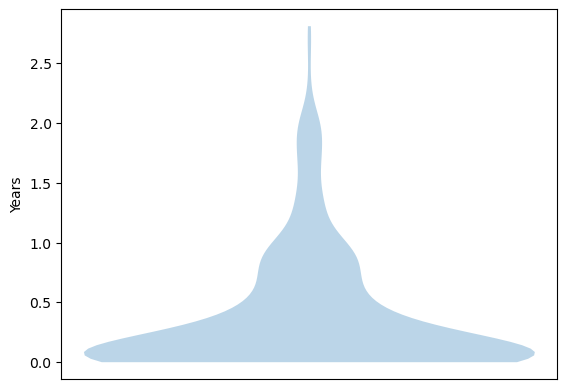

In [27]:
orders_by_customer = {}
for customer_id, order_time in zip(buyer_user_id, order_time):
    if customer_id not in orders_by_customer:
        orders_by_customer[customer_id] = []
    orders_by_customer[customer_id].append(order_time)

# Initialize a list to hold all time differences
all_time_diffs = []

# Calculate time differences for all customers
for times in orders_by_customer.values():
    times.sort()  # Ensure times are in chronological order
    if len(times) > 1:
        # Calculate the deltas and extend the all_time_diffs list
        all_time_diffs.extend([times[i] - times[i-1] for i in range(1, len(times))])
print(all_time_diffs)
years = [t.days / 365.25 for t in all_time_diffs]
plt.violinplot(years, showmeans=False, showmedians=False,showextrema=False)
plt.ylabel('Years')
plt.xticks([])

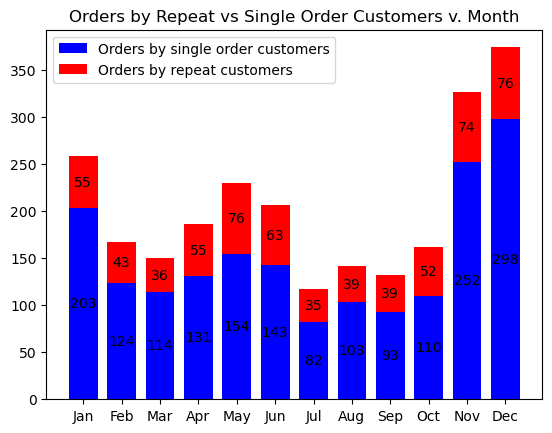

In [28]:
mult_cust_times = {}
single_cust_times = {}

for id, dates in orders_by_customer.items():
    if len(dates) > 1:
        mult_cust_times[id] = dates
    else:
        single_cust_times[id] = dates

single_by_month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
multiple_by_month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

months_abbreviations = [
    "Jan", "Feb", "Mar", 
    "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", 
    "Oct", "Nov", "Dec"
]


for id, dates in mult_cust_times.items():
    for datetime in dates:
        month = datetime.month
        multiple_by_month[month - 1] += 1

for id, dates in single_cust_times.items():
    single_by_month[dates[0].month - 1] += 1

fig, ax = plt.subplots()
bottom = 12

width = .75

for index in range(12):
    p = ax.bar(months_abbreviations[index], single_by_month[index], width, bottom=0, color='blue')
    q = ax.bar(months_abbreviations[index], multiple_by_month[index], width, bottom=single_by_month[index], color='red')

    ax.bar_label(p, label_type='center')
    ax.bar_label(q, label_type='center')

ax.set_title('Orders by Repeat vs Single Order Customers v. Month')
ax.legend(['Orders by single order customers', 'Orders by repeat customers'])

plt.show()

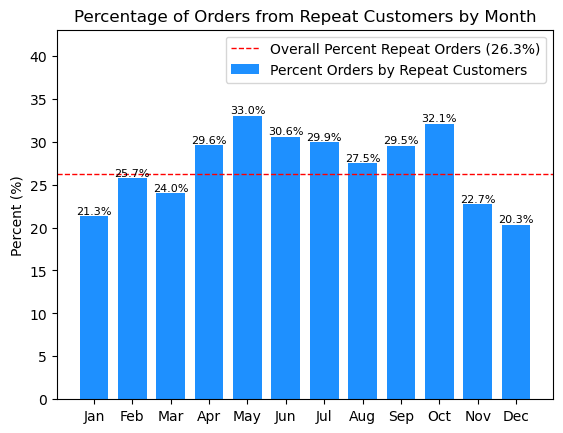

In [29]:
percent_repeat_by_month = [(multiple_by_month[i]/(multiple_by_month[i]+single_by_month[i]))*100 for i in range(len(single_by_month))]
mean_percent_repeat = sum(multiple_by_month)/(sum(single_by_month)+sum(multiple_by_month))*100

months_abbreviations = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax1 = plt.subplots()

# Bar chart
bars = ax1.bar(months_abbreviations, percent_repeat_by_month, width=.75, color='dodgerblue', label='Percent Orders by Repeat Customers')
ax1.axhline(y=mean_percent_repeat, color='red', linestyle='--', linewidth=1, label='Overall Percent Repeat Orders (26.3%)')

# Adding labels to each bar
labels = [f'{value:.1f}%' for value in percent_repeat_by_month]
ax1.bar_label(bars, labels=labels, fontsize=8)

ax1.set_ylabel('Percent (%)')
ax1.set_title('Percentage of Orders from Repeat Customers by Month') 
ax1.set_ylim(0, max(percent_repeat_by_month) + 10)

plt.legend()
plt.show()

# Geolocation

In [30]:
import pycountry_convert

country_list = Counter(country)
country_list = pd.DataFrame.from_dict(country_list, orient='index').reset_index()
country_list = country_list.rename(columns={"index":"country", 0:"number_of_orders"})
country_list['country'] = country_list.country.apply(lambda x: pycountry_convert.country_name_to_country_alpha3(pycountry_convert.country_alpha2_to_country_name(x)))

In [31]:
fig = px.scatter_geo(country_list, locations="country", size="number_of_orders",
                     projection="natural earth")
fig.show()

In [32]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

state_list = Counter(state)
state_list = pd.DataFrame.from_dict(state_list, orient='index').reset_index()
state_list = state_list.rename(columns={"index":"state", 0:"number_of_orders"})
# state_list['country'] = state_list.country.apply(lambda x: pycountry_convert.country_name_to_country_alpha3(pycountry_convert.country_alpha2_to_country_name(x)))
fig = px.choropleth(state_list, locationmode = 'USA-states', locations='state', color='number_of_orders',
                        color_continuous_scale="Greens",
                        range_color=(0, 150),
                        scope="usa",
                        labels={'number_of_orders':'Number of Orders'},
                        )
fig.update_layout(title_text = 'Etsy Orders by State', geo_scope='usa', margin={"r":20,"t":80,"l":0,"b":30})
fig.show()

In [34]:
id_state = extract_data(orders, 'buyer_user_id', 'state')
state = extract_data(orders, 'state')

all_states_list = list(Counter(state).keys())
states_dict = {key: [] for key in all_states_list}

for customer in id_state:
    states_dict[customer[1]].append(customer[0])

percent_reorder_by_state = {}
for state, ids in states_dict.items():
    num_orders = Counter(Counter(states_dict[state]).values())
    one_order = 0
    multiple_orders = 0
    for number_of_orders, number_of_customers in num_orders.items():
        if number_of_orders == 1:
            one_order += number_of_customers
        if number_of_orders > 1:
            multiple_orders += number_of_customers
    if one_order + multiple_orders > 20:
        percent_reorder_by_state[state] = multiple_orders / (one_order + multiple_orders)

state_reorder_df = pd.DataFrame.from_dict(percent_reorder_by_state, orient='index').reset_index()
state_reorder_df = state_reorder_df.rename(columns={"index":"state", 0:"reorder_rate"})
fig = px.choropleth(state_reorder_df, locationmode = 'USA-states', locations='state', color='reorder_rate',
                        color_continuous_scale="Greens",
                        range_color=(0, .2),
                        scope="usa",
                        labels={'reorder_rate':'Percent Repeat Customers by State'},
                        )
fig.update_layout(title_text = 'Etsy Orders by State', geo_scope='usa', margin={"r":20,"t":80,"l":0,"b":30})
fig.show()